## p262 신용카드 사기 검출

In [2]:
# conda install -c forge imbalanced 뭐 설치

In [3]:
# 깃허브는 100메가 넘는거 못올려서 나중에 업로드할 때 빼고 올려야 함

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
card_df = pd.read_csv('creditcard.csv')
card_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop(columns=['Time'],inplace=True)
    return df_copy

In [11]:
def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    X=df_copy.iloc[:,:-1]
    y=df_copy.iloc[:,-1]
    X_train,X_test,y_train,y_test = train_test_split(X,
                                                     y,
                                                     test_size=0.3,
                                                     random_state=0,
                                                    stratify=y) #비율맞춰줌
    return X_train,X_test,y_train,y_test

In [12]:
X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)

In [14]:
y_train.value_counts()/y_train.shape[0]*100

0    99.827451
1     0.172549
Name: Class, dtype: float64

In [15]:
y_test.value_counts()/y_test.shape[0]*100

0    99.826785
1     0.173215
Name: Class, dtype: float64

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

In [18]:
def get_clf_eval(y_test,pred,pred_proba):
    from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f},정밀도:{precision:.4f},재현율:{recall:.4f},F1:{f1:.4f},auc:{auc:.4f}')

In [20]:
get_clf_eval(y_test,lr_pred,lr_pred_proba)

오차행렬
[[85279    16]
 [   58    90]]
정확도:0.9991,정밀도:0.8491,재현율:0.6081,F1:0.7087,auc:0.9589


In [21]:
def get_model_train_eval(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:,1]
    get_clf_eval(y_test,pred,pred_proba)

In [22]:
get_model_train_eval(lr_clf,X_train,X_test,y_train,y_test)

오차행렬
[[85279    16]
 [   58    90]]
정확도:0.9991,정밀도:0.8491,재현율:0.6081,F1:0.7087,auc:0.9589


In [23]:
from lightgbm import LGBMClassifier

In [24]:
lgbm_clf = LGBMClassifier(n_estimators=1000,
                          num_leaves=64,
                          n_jobs=-1,
                         boost_from_average=False)
get_model_train_eval(lgbm_clf,X_train,X_test,y_train,y_test)

오차행렬
[[85290     5]
 [   36   112]]
정확도:0.9995,정밀도:0.9573,재현율:0.7568,F1:0.8453,auc:0.9790


### p268 분포도

In [25]:
import seaborn as sns

<AxesSubplot:xlabel='Amount', ylabel='Density'>

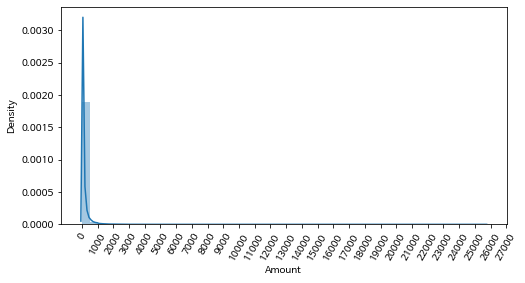

In [26]:
plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000),rotation=60)
sns.distplot(card_df['Amount'])

In [27]:
from sklearn.preprocessing import StandardScaler

In [29]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    df_copy.insert(0,'Amount_Scaled',amount_n)
    df_copy.drop(columns=['Time'],inplace=True)
    return df_copy

In [30]:
X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)

In [31]:
X_train.head(1)

,Amount_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
211605,-0.350471,-8.367621,7.402969,-5.114191,-2.966792,-0.985904,-1.660018,0.397816,1.00825,5.290976,...,3.589299,-0.557927,0.349087,0.301734,0.66233,1.145939,-0.012273,1.513736,0.669504,0.69


In [32]:
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf,X_train,X_test,y_train,y_test)

오차행렬
[[85283    12]
 [   59    89]]
정확도:0.9992,정밀도:0.8812,재현율:0.6014,F1:0.7149,auc:0.9648


In [33]:
lgbm_clf = LGBMClassifier(n_estimators=1000,
                          num_leaves=64,
                          n_jobs=-1,
                         boost_from_average=False)
get_model_train_eval(lgbm_clf,X_train,X_test,y_train,y_test)

오차행렬
[[85290     5]
 [   36   112]]
정확도:0.9995,정밀도:0.9573,재현율:0.7568,F1:0.8453,auc:0.9812


#### 로그변환

In [34]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # scaler = StandardScaler()
    # amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    amount_n = np.log1p(df_copy['Amount']) #로그에다 1더함(이유:)
    df_copy.insert(0,'Amount_Scaled',amount_n)
    df_copy.drop(columns=['Time'],inplace=True)
    return df_copy

In [35]:
X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)

In [36]:
X_train.head()

,Amount_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
211605,0.524729,-8.367621,7.402969,-5.114191,-2.966792,-0.985904,-1.660018,0.397816,1.008250,5.290976,...,3.589299,-0.557927,0.349087,0.301734,0.662330,1.145939,-0.012273,1.513736,0.669504,0.69
231628,4.033710,-1.290662,0.764452,-0.169233,-1.688528,1.984718,-0.717210,1.667635,-0.228295,-0.959071,...,0.057620,0.138615,0.390374,-0.678774,0.292254,1.425865,0.265341,0.051405,0.103879,55.47
110643,2.525729,-0.606860,0.233923,2.633361,-0.155762,-0.328850,-0.070593,0.173023,0.113394,0.680147,...,-0.129287,0.007393,0.265045,-0.040615,0.406088,-0.498823,0.121851,-0.046840,-0.087259,11.50
11478,2.397895,1.374168,-0.330389,0.812971,-0.183112,-1.074771,-0.933788,-0.544238,-0.348237,0.614925,...,0.078163,-0.134742,0.016793,0.002610,0.714527,0.536175,-0.307487,-0.003555,0.013024,10.00
243724,7.736766,-2.146505,-7.603113,-4.928224,1.449173,-2.083871,-0.984759,3.629816,-1.302973,-1.434148,...,4.009181,1.274986,-0.857670,-2.109682,0.169338,-0.322888,0.777822,-0.552258,0.304777,2290.05


In [38]:
get_model_train_eval(lr_clf,X_train,X_test,y_train,y_test) #lr

오차행렬
[[85275    20]
 [   48   100]]
정확도:0.9992,정밀도:0.8333,재현율:0.6757,F1:0.7463,auc:0.9248


In [37]:
get_model_train_eval(lgbm_clf,X_train,X_test,y_train,y_test) #lgbm

오차행렬
[[85290     5]
 [   35   113]]
정확도:0.9995,정밀도:0.9576,재현율:0.7635,F1:0.8496,auc:0.9796


### p271 이상치 제거

In [40]:
import seaborn as sns

<AxesSubplot:>

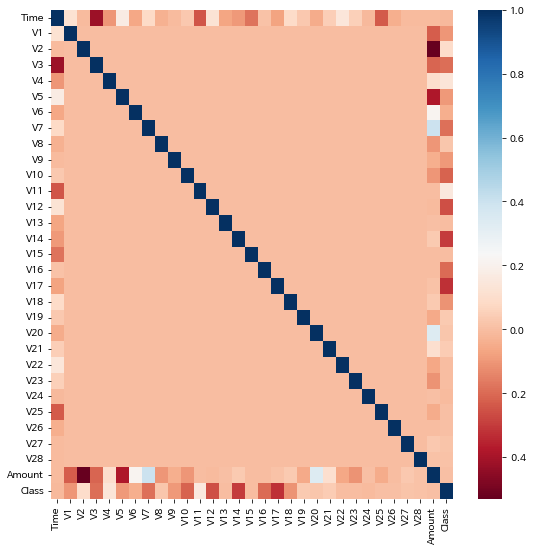

In [41]:
plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr,cmap='RdBu')

In [42]:
import numpy as np

In [46]:
def get_outlier(df=None,columns=None,weight=1.5):
    fraud = df[df['Class']==1][columns]
    q25 = np.percentile(fraud.values,25)
    q75 = np.percentile(fraud.values,75)
    iqr = q75-q25
    iqr_weight = iqr*weight
    lowest_val = q25 - iqr_weight
    highest_val = q75 +iqr_weight
    outlier_index = fraud[(fraud<lowest_val)|(fraud>highest_val)].index
    return outlier_index

In [48]:
get_outlier(card_df,'V14')

Int64Index([8296, 8615, 9035, 9252], dtype='int64')

In [49]:
get_outlier(card_df,'V17')

Int64Index([], dtype='int64')

In [50]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # scaler = StandardScaler()
    # amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    amount_n = np.log1p(df_copy['Amount']) #로그에다 1더함(이유:)
    df_copy.insert(0,'Amount_Scaled',amount_n)
    df_copy.drop(columns=['Time'],inplace=True)
    outlier_index = get_outlier(card_df,'V14')
    df_copy.drop(index = outlier_index,inplace=True)
    return df_copy

In [51]:
X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)
get_model_train_eval(X_train,X_test,y_train,y_test)

TypeError: get_model_train_eval() missing 1 required positional argument: 'y_test'

In [52]:
#p275 SMOTE

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_sample(X_train,y_train)

In [55]:
X_train.shape, X_train_over.shape

((199362, 30), (398040, 30))

In [58]:
pd.Series(y_train_over).value_counts()

0    199020
1    199020
Name: Class, dtype: int64

In [56]:
y_train.value_counts()

0    199020
1       342
Name: Class, dtype: int64

In [57]:
get_model_train_eval(lr_clf,X_train,X_test,y_train,y_test)

오차행렬
[[85281    14]
 [   53    93]]
정확도:0.9992,정밀도:0.8692,재현율:0.6370,F1:0.7352,auc:0.9597


In [59]:
def precision_recall_curve_plot(y_test,pred_proba):
    precisions,recalls,thresholds = precision_recall_curve(y_test,pred_proba)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.legend()
    plt.grid()    
    plt.show()

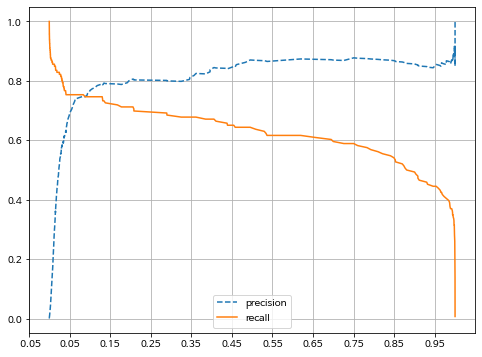

In [61]:
from sklearn.metrics import precision_recall_curve
precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

In [62]:
get_model_train_eval(lr_clf,X_train,X_test,y_train,y_test)

오차행렬
[[85281    14]
 [   53    93]]
정확도:0.9992,정밀도:0.8692,재현율:0.6370,F1:0.7352,auc:0.9597


In [ ]:
#난 왜 그래프가 다르게 나오지? 책확인